
##  Creating Customer Segments- PCA, GMM and K_Means Clustering. 

#### Unsupervised Learning

## Introduction

In this project, I have analyzed a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

##  Data Exploration:

In [22]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


##### Statistics

In [23]:
# Display a description of the dataset
data_statistics=data.describe()
display(data_statistics)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Let us Visualize the data.



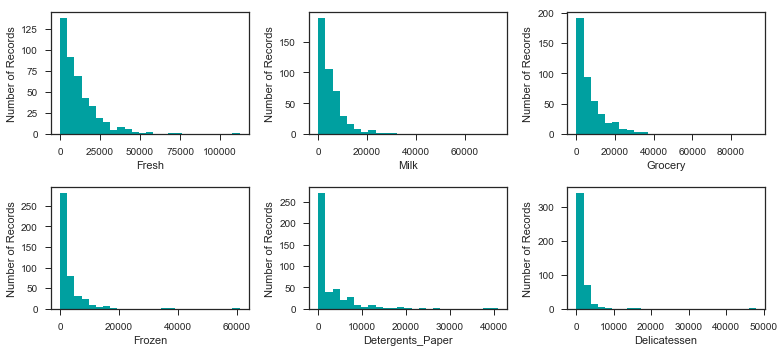

In [24]:
import matplotlib.pyplot as pl
# Create figure
fig = pl.figure(figsize = (11,5));    
for i,j in enumerate(data.columns,1):
    ax=fig.add_subplot(2, 3, i)
    ax.hist(data[j], bins = 25, color = '#00A0A0')
    fig.tight_layout()
    ax.set_xlabel(j)
    ax.set_ylabel("Number of Records")


### Stats With Median

As the data is numerical, It is important to consider median while describing the data. 

In [25]:
median=pd.DataFrame(data.median())
median_df=median.rename(index=str,columns={0: "Median"}).T
display(median_df)
#median_df=median.T.rename(index={0: 'Median'})
data_statistics_median=data_statistics.append(median_df)
display(data_statistics_median)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Median,8504.0,3627.0,4755.5,1526.0,816.5,965.5


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
Median,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000


#### Outliers

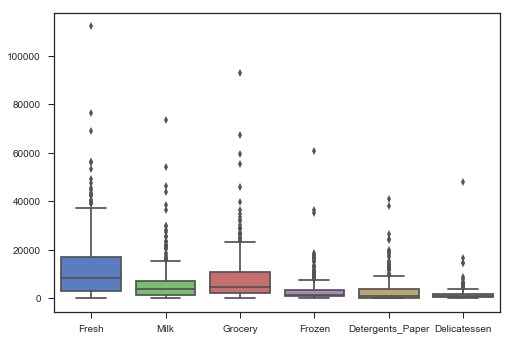

In [26]:
#Some more Explorations. For better understanding of outliers in the data.
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.boxplot(x=data)


## Dealing With Skewed Data.

In [27]:
data_unskewed=data.apply(lambda x: np.log(x + 1))

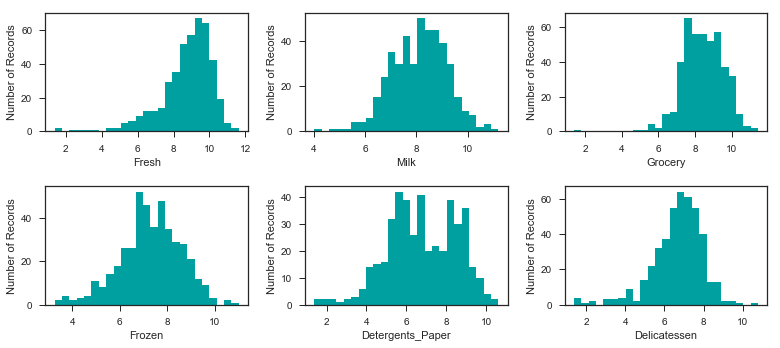

In [28]:
fig = pl.figure(figsize = (11,5));    
for i,j in enumerate(data_unskewed.columns,1):
    ax=fig.add_subplot(2, 3, i)
    ax.hist(data_unskewed[j], bins = 25, color = '#00A0A0')
    fig.tight_layout()
    ax.set_xlabel(j)
    ax.set_ylabel("Number of Records")

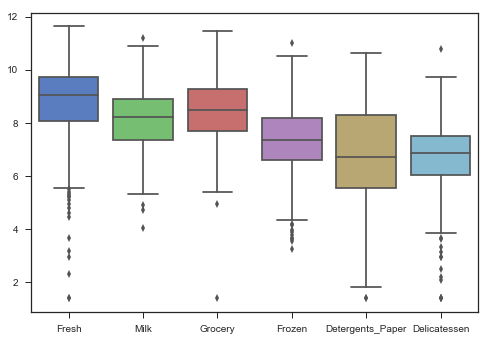

In [29]:
sns.set(style="ticks", palette="muted", color_codes=True)
sns.boxplot(x=data_unskewed)

### Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

To do this, let us consider following markets. 
1. Grocery Market, where the columns fresh, milk and Grocery are high. 
2. All of the products sales are high such as walmart or costco. 
3. Only detergent and Delicatessen are high. 
So, 

In [30]:
percentile_25=pd.DataFrame(data_statistics_median.loc["25%"])
percentile_50=pd.DataFrame(data_statistics_median.loc["50%"])
percentile_75=pd.DataFrame(data_statistics_median.loc["75%"])
#display(data.loc[data.Fresh>int(percentile_75.loc["Fresh"])].head(10))                                                           
#display(data.loc[data.Milk>int(percentile_75.loc["Milk"])].head(10))
#display(data.loc[data.Grocery>int(percentile_75.loc["Grocery"])].head(10))
#display(data.loc[data.Detergents_Paper<int(percentile_50.loc["Detergents_Paper"])].head(10))
#display(data.loc[data.Delicatessen<int(percentile_50.loc["Delicatessen"])].head(10))


select_sample_1=data.loc[(data.Fresh>int(percentile_75.loc["Fresh"]))& (data.Milk>int(percentile_75.loc["Milk"])) & (data.Grocery>int(percentile_75.loc["Grocery"])) & (data.Detergents_Paper<int(percentile_50.loc["Detergents_Paper"]))&(data.Delicatessen<int(percentile_75.loc["Delicatessen"]))]
select_sample_2=data.loc[(data.Fresh>int(percentile_75.loc["Fresh"]))& (data.Milk>int(percentile_75.loc["Milk"])) & (data.Grocery>int(percentile_75.loc["Grocery"])) &(data.Frozen>int(percentile_75.loc["Frozen"]))& (data.Detergents_Paper>int(percentile_75.loc["Detergents_Paper"])) &((data.Delicatessen>int(percentile_75.loc["Delicatessen"])) ) ]  
select_sample_3=data.loc[(data.Fresh<int(percentile_25.loc["Fresh"]))& (data.Milk<int(percentile_25.loc["Milk"])) & (data.Grocery<int(percentile_25.loc["Grocery"])) &(data.Frozen>int(percentile_50.loc["Frozen"]))]                     

display(select_sample_1)
display(select_sample_2)
display(select_sample_3)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
253,29526,7961,16966,432,363,1391


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,26373,36423,22019,5154,4337,16523
47,44466,54259,55571,7782,24171,6465
181,112151,29627,18148,16745,4948,8550


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
186,3009,521,854,3470,949,727
344,3043,1172,1763,2234,217,379


In [31]:
# Selecting three indices from above analyses.
indices = [23,253,344]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)



## Easier Way: 
#data.loc[[17,200,350],:]

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,29526,7961,16966,432,363,1391
2,3043,1172,1763,2234,217,379


Sample's Data Vs Mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,14373.0,30627.0,14068.0,2082.0,1456.0,14998.0
1,17526.0,2165.0,9015.0,-2640.0,-2518.0,-134.0
2,-8957.0,-4624.0,-6188.0,-838.0,-2664.0,-1146.0


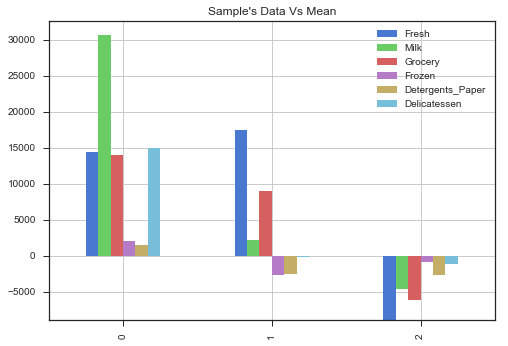

In [32]:
print "Sample's Data Vs Mean:"
mean_diff=samples - np.around(data.mean().values)
display(mean_diff)
mean_diff.plot.bar(fig=fig,title="Sample's Data Vs Mean", grid=True)


Samples Data Vs Median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17869.0,32796.0,17263.0,3628.0,3521.0,15557.0
1,21022.0,4334.0,12210.0,-1094.0,-453.0,425.0
2,-5461.0,-2455.0,-2993.0,708.0,-599.0,-587.0


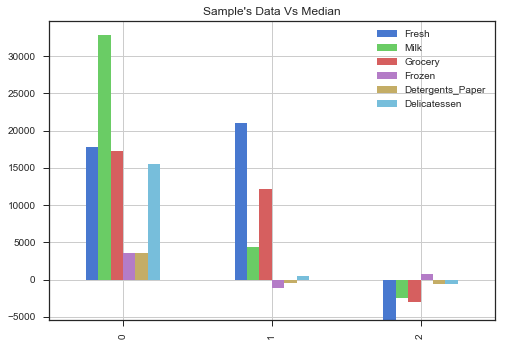

In [33]:
print "Samples Data Vs Median:"
median_diff=samples - np.around(data.median().values)
display(median_diff)
median_diff.plot.bar(fig=fig,title="Sample\'s Data Vs Median", grid=True)

Comparing With Whole Data--Percentiles


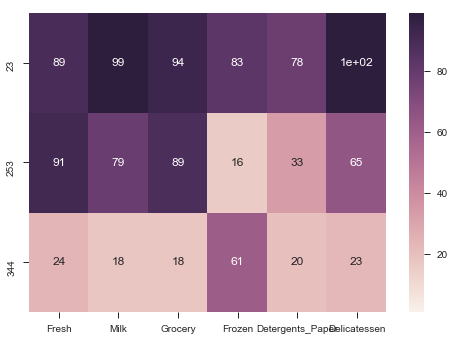

In [34]:
print "Comparing With Whole Data--Percentiles"

sns.heatmap((100*data.rank(pct=True)).iloc[indices], vmin=1, vmax=99, annot=True)

### Samples Description:
From Above Representations, We can say that: 

For Index 0 or Original Index 23:
1. Considering the values or observing at the above heat map, we can say that the customer spent "High" on Everything. So, the customer might be an example of a retailer such as Walmart, which sells all the goods, so it buys everything from sellers or farmers.
2. Consumer might be a student residence, where everything is provided by the management.


For Index 1 or original Index 253:

Customer spent "Less" on Frozen Products and Detergents. And at the same time customer spent more on Fresh, Milk and Grocery and Moderate amount on Deli. And customer spent less than median and mean for products: Frozen Products and Detergents. 
So, Customer is a segment of customers that prepares and sells food. i.e. maintain restaurents like Waffle House. 

For Index 2 or Original index 344: 

Here customer segmented in an area of customers that purchases frozen goods more. So,customer purchases all the other products less than mean and median.
This customer might be an under a segment like ConAgra Foods. or comes from a region where there is no access to fresh foods. 



### Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

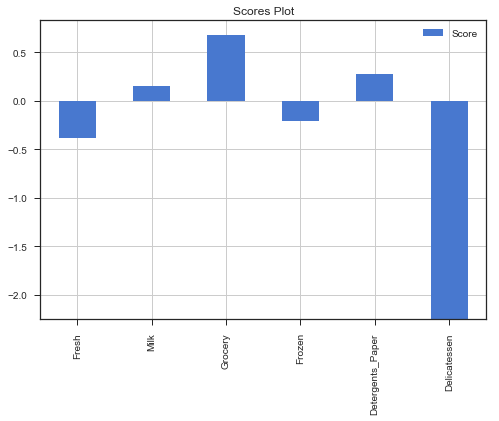

In [35]:
# Made a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
test_variables=list(data.columns)
scores=list()
for i in test_variables:
    test_feature=data[i]
    test_data=data.drop([i], axis = 1)  
    X_train, X_test, y_train, y_test = train_test_split(test_data, test_feature,
                                                    test_size=0.25, random_state=42)
    test_tree=DecisionTreeRegressor(random_state=42)
    test_tree.fit(X_train, y_train)
    score = test_tree.score(X_test, y_test)
    scores.append(score)
scores=pd.DataFrame(scores,index=test_variables,columns={"Score"})

scores.plot.bar(fig=fig,title="Scores Plot", grid=True)





## Selecting Least Important Feature.

So,In order to do this, Out of selecting a feature in the open space I have done with every feature available i.e. 
data.columns and plotted the scores on the graph to get a better understanding. 
What I have got from this is: 
I have observed that - Grocery feature has the highest R2 Score. So, comparitively it was unnecessary to segment the customer buying habits. The reported prediction score was 0.68. Comparing to the other five features, Grocery appears loosely correlated  but the value of R2 itself is not sufficient to just ignore this feature. 

Other Features. : 
Detergents has a positive R2 Score. All the others have negative R2 score. That implies they are important for predicting or segmenting customer buying habits. 

What we can take off: 

We can say that the importance of Delicatessen is more but can not just drop Grocery solely basing R2 Score. It is less important but we can deduct anything right now. 

### Code

In [36]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature

new_data = data.drop(["Grocery"],axis=1)
feature=data["Grocery"]

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, feature, test_size=0.25, random_state=42)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)

#Fit
regressor.fit(X_train, y_train)

#  Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print('R2 score for {} as dependent variable: {}'.format("Grocery", score))

R2 score for Grocery as dependent variable: 0.681884008544


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

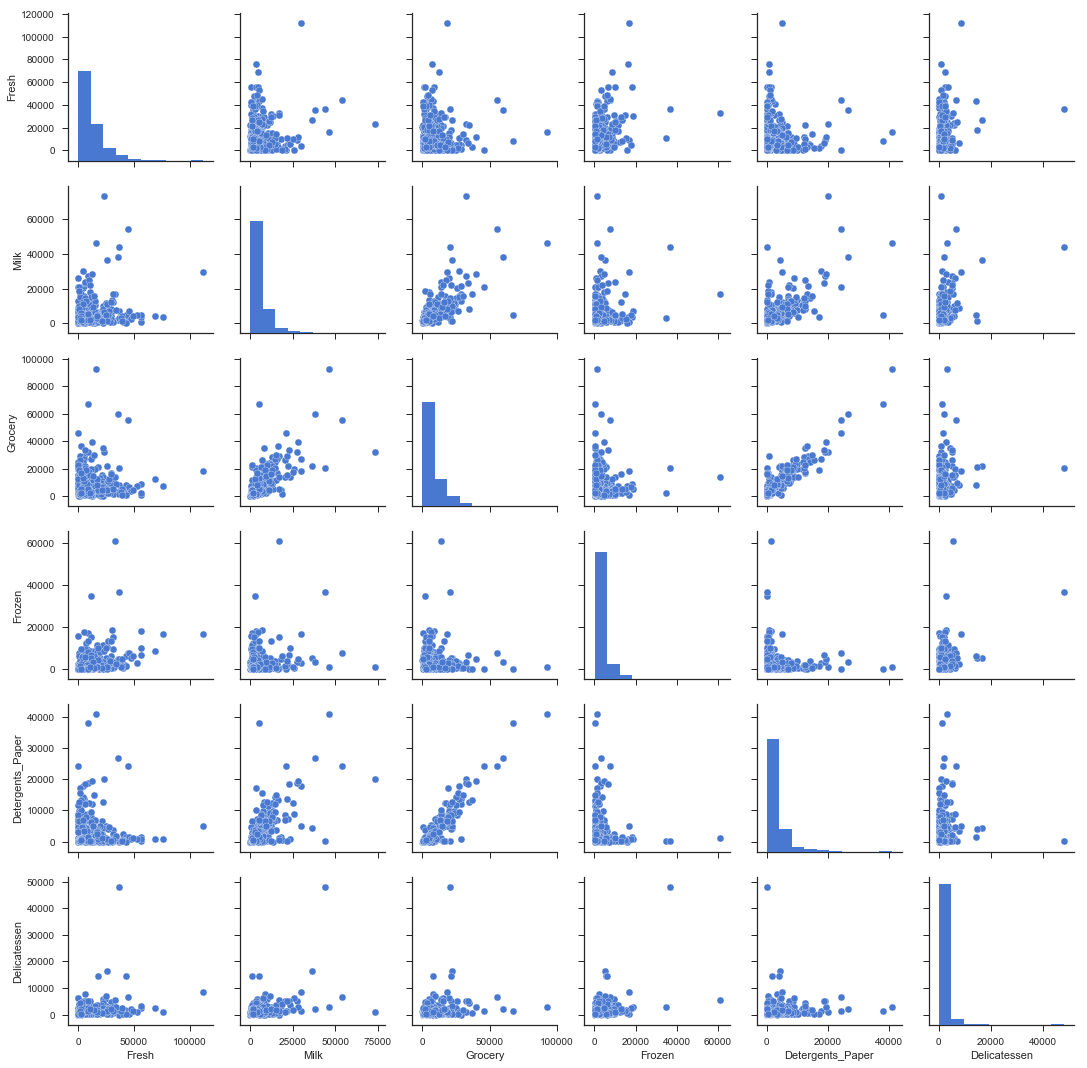

In [37]:
# Produce a scatter matrix for each pair of features in the data
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
sns.pairplot(data)

#### Feature Correlations i.e. How intedependant they are. 

From the Scatter Matrix, we can observe that 
For Feature Fresh: Frozen and Fresh Products seem to have a very little degree of correlation.
for Feature Milk: We can observe the some level of correlation between Milk and Grocery. 
For Feature Grocery: Apart from Milk, this feature correlates most with detergents_paper. We can deduce at some point that who ever buys grocery, the probability that detergents paper is in their cart is high. 
For Feature Frozen: Although it seems that there are not much relations here, but there is a very little probability that if some one picks Frozen Products, he/she might pick a Deli Product. 
For Detergents: There is no much relation between Detergents and Deli. 

Let us explore this with a heat map. 


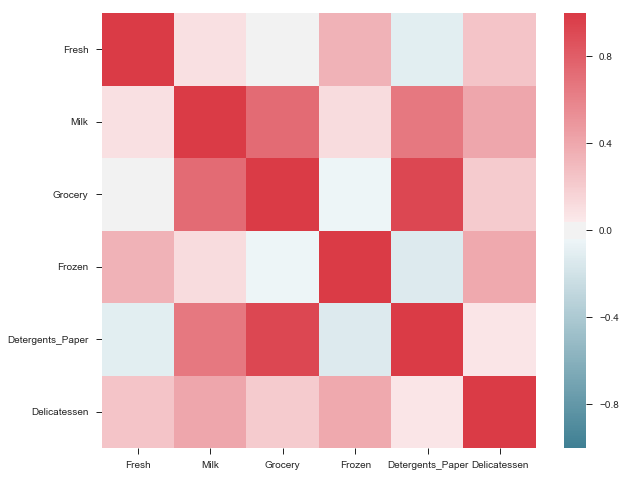

In [38]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

We can see that It is easier now to see the correlations. 


#### Pdoducts With High Correlation:
1. Grocery and Detergents. 


#### Products With Medium Correlation:
1. Milk and Grocery
2. Milk and Detergents_Paper


#### Products With Low Correlation: 
1. Milk and Deli
2. Frozen and Fresh.
3. Frozen and Deli. 



Correlation With R2 Score: 
We have observed that Grocery's importance is less and Deli's is high. The correlation heat map also suggests the same. The identification of one's Detergents buying habits, we can get to an idea about buying habits of Grocery and Vice versa. 

It is obvious from this and other visualizations(In[3]), that data is skewed positively(Right) i.e. data is skewed to the left. This even suggests there are too many outliers in the data. In all the six features, we can say that the bunch of customers who are spending less are very high relative to who are spending high. So there is a need to normalise the data. (Clustering needs a normal distribution of data)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.



In [39]:
display(data_statistics_median.loc["mean"]-data_statistics_median.loc["Median"])

Fresh               3496.297727
Milk                2169.265909
Grocery             3195.777273
Frozen              1545.931818
Detergents_Paper    2064.993182
Delicatessen         559.370455
dtype: float64

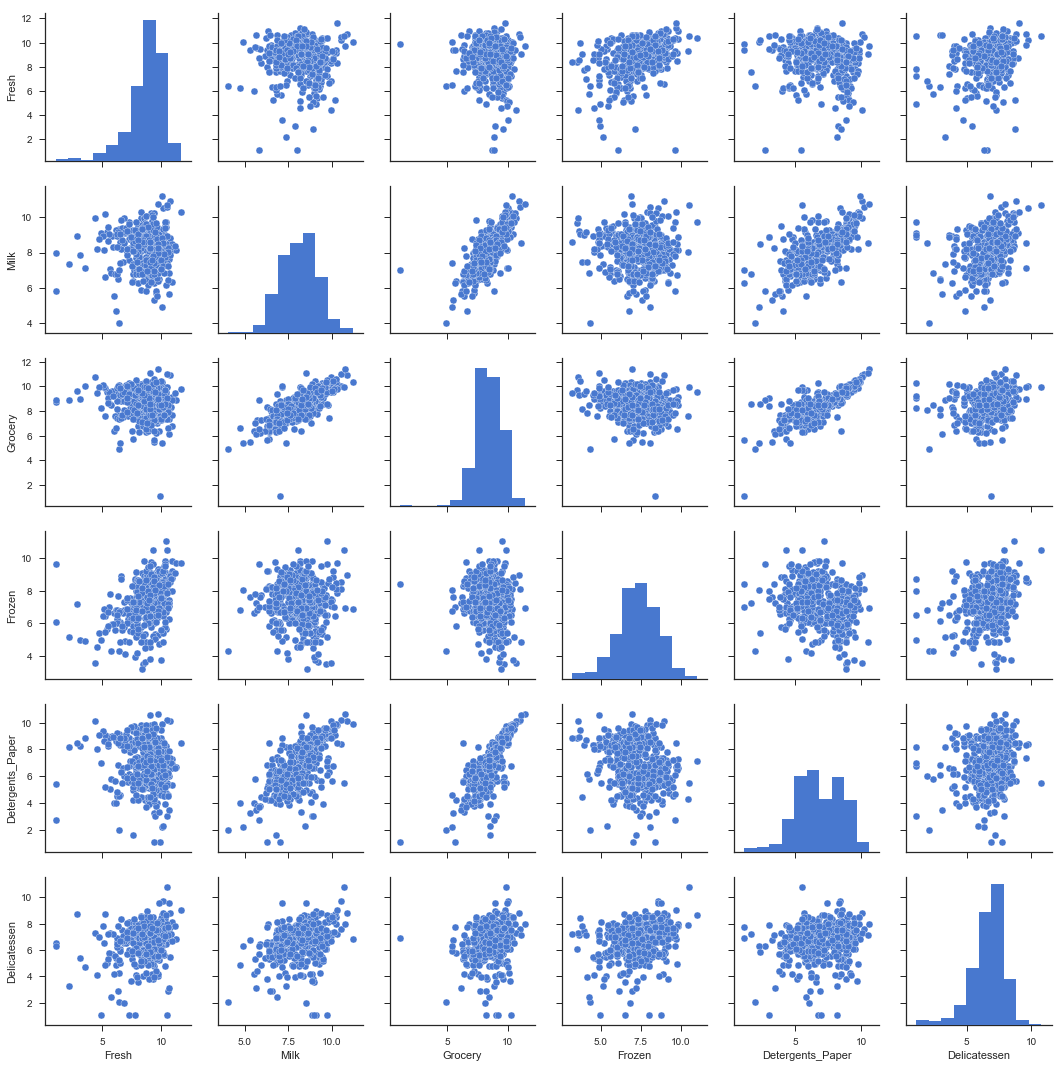

In [40]:
#  Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
#pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
sns.pairplot(log_data)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

In [41]:
# Display the log-transformed sample data
display(log_samples)
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
1,10.293027,8.982310,9.738967,6.068426,5.894403,7.237778
2,8.020599,7.066467,7.474772,7.711549,5.379897,5.937536


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,29526,7961,16966,432,363,1391
2,3043,1172,1763,2234,217,379


### Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [42]:
# For each feature find the data points with extreme high or low values
data_extremes_list=list()
for feature in log_data.keys():
    
    #  Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    
    
    #  Calculate Q3 (75th percentile of the data) for the given feature
    Q3 =np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    data_extremes=log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    #display(data_extremes)
    data_extremes_list.append(list(data_extremes.index))
#data_extremes_list=sorted(data_extremes_list)

find_duplicates= list()
remove_duplicates=list()
for i in data_extremes_list:
    for j in i:
        if j not in find_duplicates:
            find_duplicates.append(j)
        elif j not in remove_duplicates:
            remove_duplicates.append(j)

display(sorted(remove_duplicates)) 

display(np.log(data.loc[(sorted(remove_duplicates))]))
    
# Select the indices for data points you wish to remove
outliers  = [remove_duplicates]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

good_data.describe()

[65, 66, 75, 128, 154]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


######  Why  [65, 66, 75, 128, 154]  Removed? 


Data in the indices : [65, 66, 75, 128, 154]  have been an extreme outlier for more than one feature in the data. 

They have to be removed from the dataset as they are not representing the buying habits of general customers. And the main reason in detecting outliers is to reduce their effect in results i.e. clustering. In clustering the center of the cluster is determined by the distance to all the cluster. If the data is containing any outliers,i.e. if they are far from the normal data (step) they will definetely effect in choosing the center, so the segmentation.

## Feature Transformation
I have Used  principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,-0.1675,0.4014,0.4381,-0.1782,0.7514,0.1499
Dimension 2,0.2638,0.6859,0.1672,0.0707,0.5005,0.0424,0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,0.0026,-0.7192,-0.3554,0.0331,0.5582,0.2092
Dimension 6,0.0204,-0.0292,0.5402,-0.8205,-0.0205,0.1824,-0.0197


Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

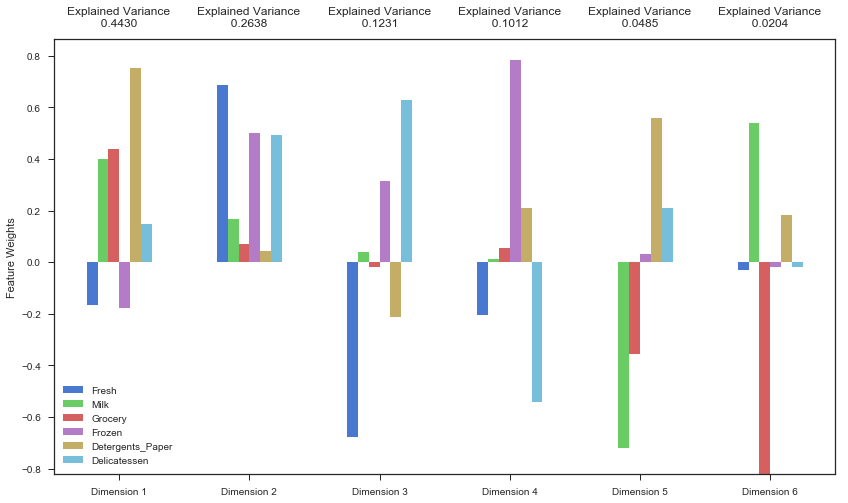

In [43]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(data.columns))

pca.fit(good_data)

#  Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

display(pca_results)

display(pca_results["Explained Variance"].cumsum())


##### PCA Analysis: 



| PC   |      Dependents      |  %age |Cumulative ( ∑%age) |
|----------|:-------------:|------:|
| PC 1|  Detergents, Grocery and Milk |44.30 |44.30|
| PC 2 |  Fresh, Frozen and Delicatessan    |   26.38 |70.68|
| PC 3 | Delicatessan and Fresh |  12.31  |82.99|
| PC 4 | Frozen and Delicatessan|  10.12  |93.11|


We can observe that: 


By first and Second Principal components, 70.68% of the variance in data is explained. 

By first four, 93.11% of variance in data is explained.

PC1 Represents: More change in Detergents, Grocery and Milk corresponding to the variance in data. So, these move together i.e. they increase or decrease proportionately.

Increase in PC1 corresponds to: 

1. Increase in the spending of Detergents, Grocery and Milk. 
2. Decrease in Frozen and Fresh. 

PC2: 

A change in PC2 is associated with changes in fresh, Frozen and Delicatessen products.

Increase in PC2 corresponds to: 

1. Increase in the spending of fresh, Frozen and Delicatessen products.

PC3: 

A change in PC3 is associated with changes in Fresh(Decrease) and Delicatessen products(Increase).

Increase in PC2 corresponds to: 

1. Increase in the purchase of  Delicatessen products.
2. Decrease in purchase of Fresh Products. 

PC4: 

A change in PC4 is associated with changes in Frozen and Delicatessan products. 

Increase in PC2 corresponds to: 

1. Decrease in the purchase of  Delicatessen products.
2. Increase in purchase of Frozen Products. 





In [44]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.8096,3.6459,1.0567,-0.5186,-0.6999,0.1811
1,0.2730,0.8816,-0.8873,-1.7007,-1.4974,-0.7824
2,-1.9818,-0.9996,0.4286,0.5009,0.1744,0.0049


 ### Observation
 
We can Observe from above that how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points. see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

### Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [45]:
#  Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

#Fit
pca.fit(good_data)

#  Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

#  Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [46]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.8096,3.6459
1,0.2730,0.8816
2,-1.9818,-0.9996


### Observation
From above, we can see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

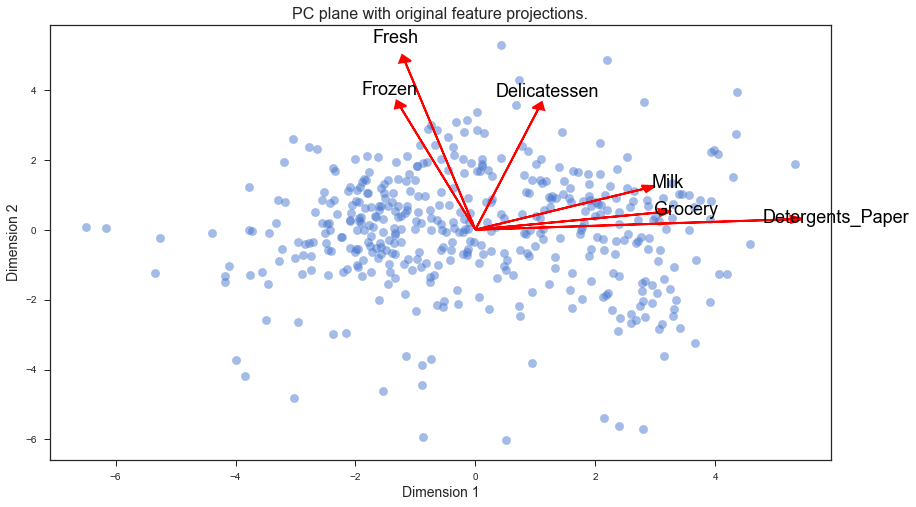

In [47]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot analyses,

##### With Dimension 1: 

Detergents and Paper, Milk and Grocery. These three features have large weights in the first dimension relative to their weights in the second dimension. Similarly other three i.e. Fresh, Frozen and Delicatessen have negative weights in this dimensions(Left to Right).

##### With Dimension 2: 
Fresh, Frozen and Delicatessen. These three features have large weights in the second dimension relative to the first dimension. 

These results totally correspond to the above analyses using barplot and PCA analyses on reduced log samples.

## Clustering

#### K-Means and GMM clustering

### GMM VS K-Means on our data

Clustering is a method of unsupervised learning, where each datapoint or cluster is grouped to into a subset or a cluster, which contains similar kind of data points. 
K-Means Clustering: 
It is an algorithm, which classifies samples based on attributes/features into K number of clusters. Clustering or grouping of samples is done by minimizing the distance between sample and the centroid. i.e. Assign the centroid and optimize the centroid based on the distances from the points to it. This is called as Hard Assignment i.e. We are certain that particular points belong to particular centroid and then based on the least squares distance method, we will optimize the place of the centroid. 
Advantages of K-Means:

1. Running Time
2. Better for high dimensional data. 
3. Easy to interpret and Implement.

Disadvantages of K-Means:

1. Assumes the clusters as spherical, so does not work efficiently with complex geometrical shaped data(Mostly Non-Linear) 
2. Hard Assignment might lead to mis grouping.


Guassian Mixture: 
Instead of Hard assgning data points to a cluster, if we are uncertain about the data points where they belong or to which group, we use this method. It uses probability of a sample to determine the feasibility of it belonging to a cluster. 

Advantages: 

1. Does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well. 
2. Does not bias the cluster sizes to have specific structures as does by K-Means (Circular).
Disadvantages:

1. Uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high.
2. Difficult to interpret.  

So, as we have restricted our data to be two dimensional, and structure of the data is less influential in case of Guassian Mixture model, we will choose Guassian Mixture model for our data. And also, based on the PCA analyses, every data point in a particular feature might represent the data from other feature as well. So, restricting by hard assigning might not be a good idea. So, for grouping the data properly, let us choose Guassian Mixture Model.

### Creating Clusters and silhouette coefficient
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In [48]:
#  Apply your clustering algorithm of choice to the reduced data 

from sklearn.mixture import GMM 
from sklearn.metrics import silhouette_score
scores=dict()
n_components_range = range(2, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for n_clusters in n_components_range:
    
    for cv_type in cv_types:
   
        #  Apply your clustering algorithm of choice to the reduced data 
        test_clusterer = GMM(n_components=n_clusters,covariance_type=cv_type,random_state=42).fit(reduced_data)

        #  Predict the cluster for each data point
        test_preds = test_clusterer.predict(reduced_data)

        #  Find the cluster centers
        test_centers = test_clusterer.means_

        #  Predict the cluster for each transformed sample data point
        sample_preds = test_clusterer.predict(pca_samples)

        #  Calculate the mean silhouette coefficient for the number of clusters chosen
        test_score = silhouette_score(reduced_data, test_preds)
        print "The average silhouette_score is : {}. for Number OF Clusters Used :{}. and for CV_Type:{}. ".format(test_score,n_clusters, cv_type)

The average silhouette_score is : 0.423837376466. for Number OF Clusters Used :2. and for CV_Type:spherical. 
The average silhouette_score is : 0.422569975755. for Number OF Clusters Used :2. and for CV_Type:tied. 
The average silhouette_score is : 0.411818864386. for Number OF Clusters Used :2. and for CV_Type:diag. 
The average silhouette_score is : 0.41174985628. for Number OF Clusters Used :2. and for CV_Type:full. 
The average silhouette_score is : 0.40020719776. for Number OF Clusters Used :3. and for CV_Type:spherical. 
The average silhouette_score is : 0.377326422205. for Number OF Clusters Used :3. and for CV_Type:tied. 
The average silhouette_score is : 0.373560747175. for Number OF Clusters Used :3. and for CV_Type:diag. 
The average silhouette_score is : 0.398431881066. for Number OF Clusters Used :3. and for CV_Type:full. 
The average silhouette_score is : 0.337403331712. for Number OF Clusters Used :4. and for CV_Type:spherical. 
The average silhouette_score is : 0.320152

### Goodness of Fit

I have used range between 2 and 8. i.e. n_clusters being 2,3,4,5,6,7. So, the above are the corresponding silhouette scores. The best score is for n_clusters is 2 and for covariance type being spherical.The value is:0.423
let us try K-Means clustering and find out how the silhoutte scores turn out for different number of clusters.

In [49]:
from sklearn.cluster import KMeans
for k in n_components_range:
    # Apply your clustering algorithm of choice to the reduced data 
    k_means_clusterer = KMeans(n_clusters=k,random_state=42).fit(reduced_data)

    #  Predict the cluster for each data point
    k_means_preds = k_means_clusterer.predict(reduced_data)

    # Find the cluster centers
    k_means_centers = k_means_clusterer.cluster_centers_

    #  Predict the cluster for each transformed sample data point
    K_means_sample_preds = k_means_clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    k_means_score = silhouette_score(reduced_data, k_means_preds)
    print "The average silhouette_score For K_means with n_clusters:{} is : {}. ".format(k_means_score, k)

The average silhouette_score For K_means with n_clusters:0.426281015469 is : 2. 
The average silhouette_score For K_means with n_clusters:0.39689092645 is : 3. 
The average silhouette_score For K_means with n_clusters:0.331841276009 is : 4. 
The average silhouette_score For K_means with n_clusters:0.349997797526 is : 5. 
The average silhouette_score For K_means with n_clusters:0.365885220633 is : 6. 
The average silhouette_score For K_means with n_clusters:0.364801207979 is : 7. 


Even here the silhouette_score is higher for K=2. and the correspondning score is 0.426.

## Best Fit

In [50]:
clusterer = GMM(n_components=2,covariance_type='spherical',random_state=42).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

#  Find the cluster centers
centers = clusterer.means_

#  Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

#  Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

print score

0.423837376466


### Cluster Visualization


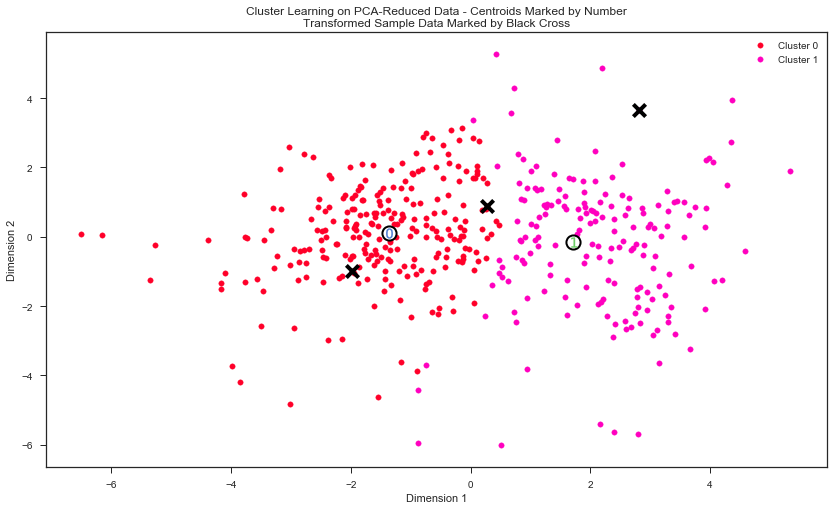

In [51]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

###  Data Recovery-Inverse Transformations.

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [52]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(log_centers)
display(true_centers)

array([[ 9.07088125,  7.59707202,  7.86818264,  7.62326603,  5.77493106,
         6.54316667],
       [ 8.38791242,  8.78987677,  9.19737375,  6.95274795,  8.07403795,
         6.88257832]])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8698.0,1992.0,2613.0,2045.0,322.0,694.0
Segment 1,4394.0,6567.0,9871.0,1046.0,3210.0,975.0


### Customer analyses. 

For this: 
As we have done earlier about a particular sample's comparision to the dataset or other customers:

In [53]:
centers_distribution_mean=true_centers-data_statistics_median.loc["mean"]
centers_distribution_median=true_centers-data_statistics_median.loc['Median']
print "Distribution According to Mean:"
display(centers_distribution_mean)
display(data_statistics_median.loc["mean"])
print "Distribution According to Median:"
display(centers_distribution_median)



Distribution According to Mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3302.297727,-3804.265909,-5338.277273,-1026.931818,-2559.493182,-830.870455
Segment 1,-7606.297727,770.734091,1919.722727,-2025.931818,328.506818,-549.870455


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
Name: mean, dtype: float64

Distribution According to Median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,194.0,-1635.0,-2142.5,519.0,-494.5,-271.5
Segment 1,-4110.0,2940.0,5115.5,-480.0,2393.5,9.5


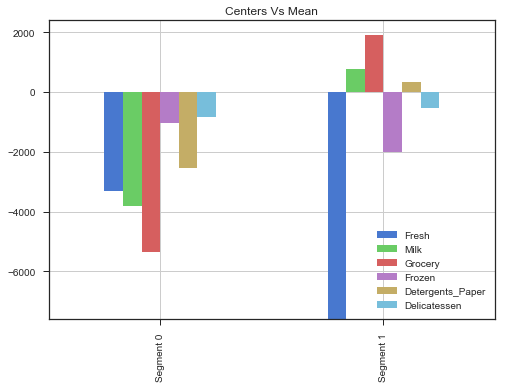

In [54]:
centers_distribution_mean.plot.bar(fig=fig,title="Centers Vs Mean", grid=True)

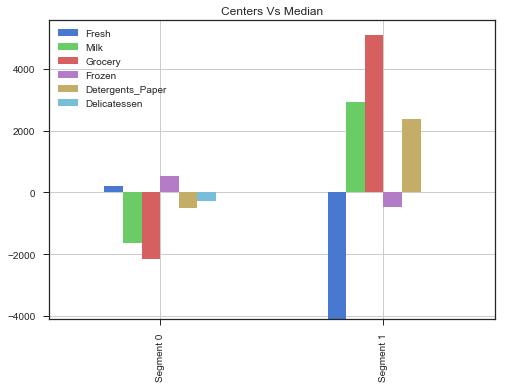

In [55]:
centers_distribution_median.plot.bar(fig=fig,title="Centers Vs Median", grid=True)

Vs Mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3391.372414,-3796.103448,-5298.158621,-1051.126437,-2526.473563,-842.797701
Segment 1,-7695.372414,778.896552,1959.841379,-2050.126437,361.526437,-561.797701


Vs Median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,133.0,-1642.0,-2144.0,504.0,-491.0,-273.0
Segment 1,-4171.0,2933.0,5114.0,-495.0,2397.0,8.0


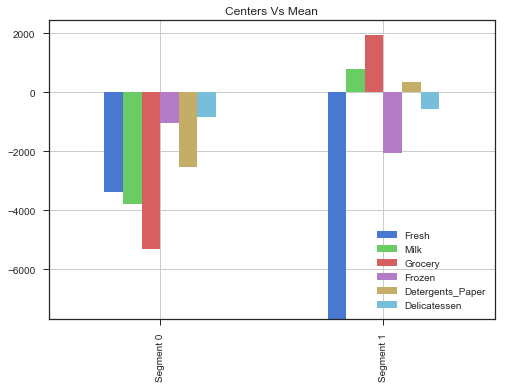

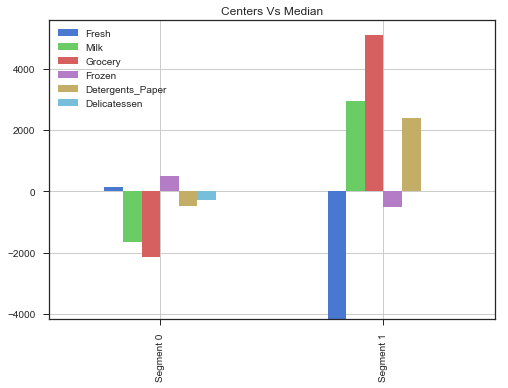

In [56]:
good_data2 = data.drop(data.index[outliers]).reset_index(drop = True)
good_statistics=good_data2.describe()
good_statistics=good_statistics.append(pd.DataFrame(good_data2.median(),columns={"median"}).T)
print "Vs Mean"
display(true_centers-good_statistics.loc["mean"])
(true_centers-good_statistics.loc["mean"]).plot.bar(fig=fig,title="Centers Vs Mean", grid=True)
print "Vs Median"
display(true_centers-good_statistics.loc["median"])
(true_centers-good_statistics.loc["median"]).plot.bar(fig=fig,title="Centers Vs Median", grid=True)



The Reason for analysing the mean and median distributions with out outliers is to ensure that the sensitivity of mean to outliers does not driving the conclusions for our segmention of customers. Even though we have analysed the distribution to data with out outliers, there is high probability that mean is being driven by some customers who purchases in huge amounts. So let us take central measure as median to evaluate. 

So, For:

Segment 0:
This is the segment of customers who purchases fresh and Frozen products. i.e. the customers has spent more than median spending for Fresh and Frozen Products. This Segment represents Big restaurents where they sell cooked meat(purchased as frozen) and all the other vegetarian(Purchases as Fresh) products as well.


Segment 1:
This segments represents customers who purchases Milk, Grocery, and Detergents paper more. i.e. the customers has spent more than median spending for Milk, Grocery, and Detergents paper. This segment is an example of Cafes, Mid-sized restaurents, Grocery Stores.



### Sample Data Predictions and Respective Consumer Cluster/Segment Analysis.

In [57]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [58]:
display(samples-good_statistics.loc["median"])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17808.0,32789.0,17262.0,3613.0,3524.0,15556.0
1,20961.0,4327.0,12209.0,-1109.0,-450.0,424.0
2,-5522.0,-2462.0,-2994.0,693.0,-596.0,-588.0


So,
sample 1: 
Based on the customer spending on Milk, Grocery and Detergents this is reasonable to be segmented into Cluster 1. i.e. This sample is segmented to cluster 1, where spending on "Milk", "Grocery" And "Detergents_Paper" is more. This Would be an example of Publix. (Where Deli is also constitutes major sale.)

Sample 2: 
Based on the customer spending on Fresh (Though the spending in Frozen is less) this is reasonable to be segmented into Cluster 0. i.e. This sample is segmented to cluster 0, where spending on "Fresh" and "Frozen" is more. Typical Example is Arby's. 

Sample 3: 

Based on the customer spending on Frozen(Though the spending in Fresh is less) this is reasonable to be segmented into Cluster 0. i.e. This sample is segmented to cluster 0, where spending on "Fresh" and "Frozen" is more. 


### Wholesale Distributor Problem Analysis.  

### A/B Testing For a Distributor

### Effect of changing 5 days delivery to 3 delivery on different clustered customers.

Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. 


Let us just try intuition.


On Segment 1: 
The major ditribution of this cluster is based on products "Milk", "Grocery" and "Detergents_Paper."
So, if the distributor has restricted to 3 days instead of 5, the impact will be less on this segment of customers. The products here are mostly stay longer compared to products in segment 0.   

On Segment 0:
For this segment, the customers purchase Fresh and Frozen products. The new delivery sequence might back fire in this segment of customers. 

So, To find out which customers would respond positively and which customers back fire to the restricted delivery service, segment customers to A and B sets. But we have to group the customers so that we include customers of both segments. Customers belonging to segment 0 would be equaly split between A and B, and repeat for customers of segment 1. Then Testing on A, i.e. applying the new delivery service on A and at the same time making the B set unchanged i.e. 5 days delivery. We can estimate now about the changes on the customers and analyse the type of customers, where the distributor can apply the new distributing service. 

#### Further Investigation and New Data.

### Semi-Supervised Learning. 
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  The wholesale distributor can label the new customers using only their estimated product spending and so, clustered segments can be the new labels. i.e. 0 and 1. So the targeted attribute is to which cluster, new customer belongs.  So, if a new customer is given, a supervised learning model like SVM can predict the cluster, which the customer is segmented to based on his/her purchasing habits. 


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

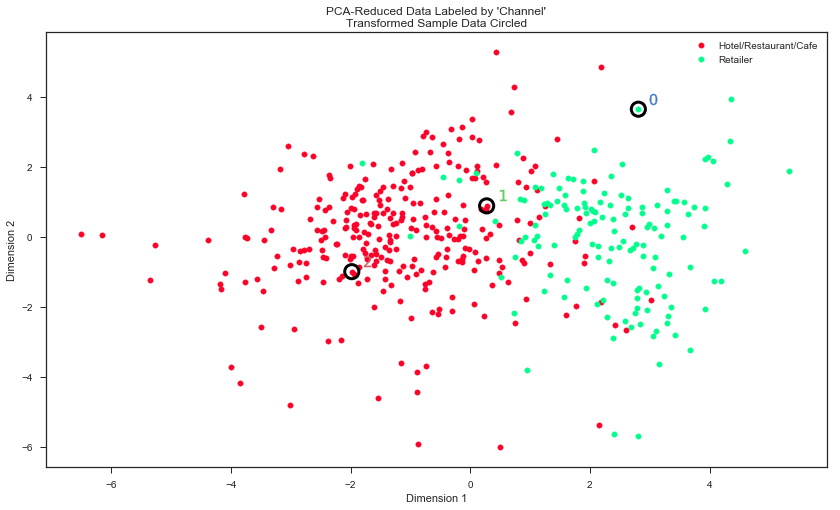

In [59]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Conclusion


No algorithm gives the perfect solution. The major gropus to Retailers' and 'Hotels/Restaurants/Cafes' corresponds to number of clusters predicted by the algorithm. We can observe from the algorithm segmentation that the clustering of customers can not be divided to Retailers' or 'Hotels/Restaurants/Cafes'. These classifications are consistent with the my previous analyses on customers. i.e. Cluster 0 represents customers from Big Restaurents and Cluster 1 represents Customers from mid-sized restaurents and Cafes. Clearly, there is no clear segmentation between resturents and Retailers. 